# 数据变换
把数据变换成适合的形式
常见的方式
- 规范化
- 连续属性离散化
- 特征二值化

## 数据规范化
解决哪些影响？
- 量纲不同
- 数值范围差异大
规范化常用方法
- 最小-最大规范化（离差标准化）
- z-score规范化（零均值标准化）
- 小数定标规范化

In [51]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

In [2]:
# 波士顿房价数据集
boston = datasets.load_boston()

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
df = pd.DataFrame(boston.data[:, 4:7])

In [10]:
df.columns = boston.feature_names[4:7]

In [11]:
df.head()

,NOX,RM,AGE
0,0.538,6.575,65.2
1,0.469,6.421,78.9
2,0.469,7.185,61.1
3,0.458,6.998,45.8
4,0.458,7.147,54.2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NOX     506 non-null    float64
 1   RM      506 non-null    float64
 2   AGE     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


### 最小-最大规范化
$x{'}=\frac{x-min}{max-min} $

In [14]:
(df - df.min()) / (df.max() - df.min())

,NOX,RM,AGE
0,0.314815,0.577505,0.641607
1,0.172840,0.547998,0.782698
2,0.172840,0.694386,0.599382
3,0.150206,0.658555,0.441813
4,0.150206,0.687105,0.528321
...,...,...,...
501,0.386831,0.580954,0.681771
502,0.386831,0.490324,0.760041
503,0.386831,0.654340,0.907312
504,0.386831,0.619467,0.889804


In [16]:
preprocessing.minmax_scale(df)

array([[0.31481481, 0.57750527, 0.64160659],
       [0.17283951, 0.5479977 , 0.78269825],
       [0.17283951, 0.6943859 , 0.59938208],
       ...,
       [0.38683128, 0.65433991, 0.90731205],
       [0.38683128, 0.61946733, 0.88980433],
       [0.38683128, 0.47307913, 0.80226571]])

### z-score规范化
$x'=\frac{x-\bar{x} }{\sigma }$

特征：
- 使用最多
- 处理后数据的均值为0，标准差为1

In [17]:
(df - df.mean()) / df.std()

,NOX,RM,AGE
0,-0.144075,0.413263,-0.119895
1,-0.739530,0.194082,0.366803
2,-0.739530,1.281446,-0.265549
3,-0.834458,1.015298,-0.809088
4,-0.834458,1.227362,-0.510674
...,...,...,...
501,0.157968,0.438881,0.018654
502,0.157968,-0.234316,0.288648
503,0.157968,0.983986,0.796661
504,0.157968,0.724955,0.736268


In [18]:
preprocessing.scale(df)

array([[-0.14421743,  0.41367189, -0.12001342],
       [-0.74026221,  0.19427445,  0.36716642],
       [-0.74026221,  1.28271368, -0.26581176],
       ...,
       [ 0.15812412,  0.98496002,  0.79744934],
       [ 0.15812412,  0.72567214,  0.73699637],
       [ 0.15812412, -0.36276709,  0.43473151]])

### 小数定标规范化
$x'=\frac{x }{10^{j}} $

特征：
- 移动小数点位置，移动位数取决于属性绝对值的最大值
- 常见落在[-1,1]之间

In [21]:
df / 10 ** np.ceil(np.log10(df.abs().max()))

,NOX,RM,AGE
0,0.538,0.6575,0.652
1,0.469,0.6421,0.789
2,0.469,0.7185,0.611
3,0.458,0.6998,0.458
4,0.458,0.7147,0.542
...,...,...,...
501,0.573,0.6593,0.691
502,0.573,0.6120,0.767
503,0.573,0.6976,0.910
504,0.573,0.6794,0.893


## 连续属性离散化
方法：
- 分箱：等宽法、等频法
- 聚类

### 等宽法

In [25]:
df2 = pd.cut(df.AGE, 5, labels=range(5))

In [26]:
type(df2)

pandas.core.series.Series

In [44]:
df2.head()

0    3
1    3
2    2
3    2
4    2
Name: AGE, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

(array([ 45.,   0.,  71.,   0.,   0.,  70.,   0.,  81.,   0., 239.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

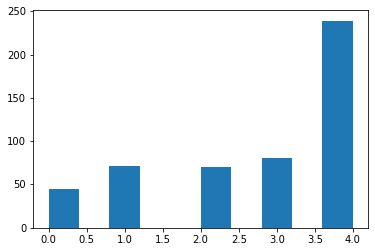

In [52]:
plt.hist(df2)

### 等频法

In [53]:
df3 = pd.qcut(df.AGE, 5, labels=range(5))

(array([102.,   0., 101.,   0.,   0., 101.,   0., 101.,   0., 101.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

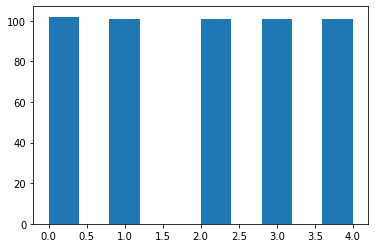

In [55]:
plt.hist(df3)

## 特征二值化

In [47]:
X = boston.target.reshape(-1, 1)

In [48]:
X

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [49]:
Binarizer(threshold=20.0).fit_transform(X)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],